In [63]:
#import the required libs
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib import ft2font

In [64]:
#configuration file to train the model 
config_files = '../Data_Sets/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = '../Data_Sets/frozen_inference_graph.pb' #freeze model, produce a sinular file 
#with the information about the graphs and checkpoint variables, save the hyperparams as constants

#the tensorflow object detection model 
model = cv.dnn_DetectionModel(frozen_model, config_files)

In [65]:
#the coco data set contains object classes, so this step we read the dataset and examine
# its information like number of classes and its labels

#Read the COCO datasets
class_labels  = []
file_name = '../Data_Sets/yolo3.txt'

with open(file_name, 'rt') as fpt:
    class_labels = fpt.read().rstrip('\n').split('\n')

print("Number of Classes", len(class_labels))

Number of Classes 80


In [66]:
#we set the params such as size, scaling, mean and color values of the input image
#params provided to the model act as training params

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 0x7f0d9c92d830>

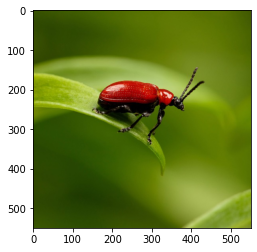

In [67]:
#read the sample images using matplotlib

img = cv.imread('../Data_Sets/train.jpg')
#plt.imshow(img)
#convert image to RGB

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [68]:
class_index, confidence, bbox = model.detect(img, confThreshold=0.5)

In [69]:
# print(confidence)
# print(bbox)
print(class_index)

()


In [70]:
#bounding box prints the axis so we can get the location of the object in the image
print(bbox)

()


In [71]:
#plotting boxes around the images -> confidence

from turtle import color


font_scale = 2
font = cv.FONT_HERSHEY_SCRIPT_SIMPLEX

for ClassInd, conf, boxes in zip(class_index.flatten(), confidence.flatten(), bbox):
    cv.rectangle(img, boxes, (0,255,0), 3)
    cv.putText(img, class_labels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(240, 60, 90), thickness=4)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

AttributeError: 'tuple' object has no attribute 'flatten'